Source: https://medium.com/analytics-vidhya/multiple-linear-regression-from-scratch-using-only-numpy-98fc010a1926

https://www.analyticsvidhya.com/blog/2021/05/multiple-linear-regression-using-python-and-scikit-learn/

### ***Equation for multiple variables***

* $y = a + bx_{1} + cx_{2} +...+ yx_{n}$

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [4]:
cd /content/drive/MyDrive/Basic_DeepLearning/Raw Algotithms Implementation /Linear Regression

/content/drive/MyDrive/Basic_DeepLearning/Raw Algotithms Implementation /Linear Regression


In [19]:
train = pd.read_csv("train_data.csv")
test = pd.read_csv("test_data.csv")
train.head()

,Unnamed: 0,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,1,60,3,8450,1,3,3,0,4,0,5,2,2,0,5,7,5,2003,2003,1,0,12,13,1,196.0,2,4,2,2,3,3,2,706,5,0,150,856,1,0,1,4,854,0,1710,1,0,2,1,3,1,2,6,0,1,1,2,4,4,2,0,61,0,0,0,0,0,2,2008,8,4,12.247694
1,1,2,20,3,9600,1,3,3,0,2,0,24,1,2,0,2,6,8,1976,1976,1,0,8,8,2,0.0,3,4,1,2,3,1,0,978,5,0,284,1262,1,0,1,4,0,0,1262,0,1,2,0,3,1,3,6,1,1,1,2,4,4,2,298,0,0,0,0,0,0,5,2007,8,4,12.109011
2,2,3,60,3,11250,1,0,3,0,4,0,5,2,2,0,5,7,5,2001,2002,1,0,12,13,1,162.0,2,4,2,2,3,2,2,486,5,0,434,920,1,0,1,4,866,0,1786,1,0,2,1,3,1,2,6,1,1,1,2,4,4,2,0,42,0,0,0,0,0,9,2008,8,4,12.317167
3,3,4,70,3,9550,1,0,3,0,0,0,6,2,2,0,5,7,5,1915,1970,1,0,13,15,2,0.0,3,4,0,3,1,3,0,216,5,0,540,756,1,2,1,4,756,0,1717,1,0,1,0,3,1,2,6,1,5,2,3,4,4,2,0,35,272,0,0,0,0,2,2006,8,0,11.849398
4,4,5,60,3,14260,1,0,3,0,2,0,15,2,2,0,5,8,5,2000,2000,1,0,12,13,1,350.0,2,4,2,2,3,0,2,655,5,0,490,1145,1,0,1,4,1053,0,2198,1,0,2,1,4,1,2,6,1,1,1,3,4,4,2,192,84,0,0,0,0,0,12,2008,8,4,12.429216


In [5]:
#   Removing Unnamed and Id columns
train = train.drop(["Unnamed: 0", "Id"], axis = 1)
test = test.drop(["Unnamed: 0", "Id"], axis = 1)

In [6]:
train.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,8450,1,3,3,0,4,0,5,2,2,0,5,7,5,2003,2003,1,0,12,13,1,196.0,2,4,2,2,3,3,2,706,5,0,150,856,1,0,1,4,854,0,1710,1,0,2,1,3,1,2,6,0,1,1,2,4,4,2,0,61,0,0,0,0,0,2,2008,8,4,12.247694
1,20,3,9600,1,3,3,0,2,0,24,1,2,0,2,6,8,1976,1976,1,0,8,8,2,0.0,3,4,1,2,3,1,0,978,5,0,284,1262,1,0,1,4,0,0,1262,0,1,2,0,3,1,3,6,1,1,1,2,4,4,2,298,0,0,0,0,0,0,5,2007,8,4,12.109011
2,60,3,11250,1,0,3,0,4,0,5,2,2,0,5,7,5,2001,2002,1,0,12,13,1,162.0,2,4,2,2,3,2,2,486,5,0,434,920,1,0,1,4,866,0,1786,1,0,2,1,3,1,2,6,1,1,1,2,4,4,2,0,42,0,0,0,0,0,9,2008,8,4,12.317167
3,70,3,9550,1,0,3,0,0,0,6,2,2,0,5,7,5,1915,1970,1,0,13,15,2,0.0,3,4,0,3,1,3,0,216,5,0,540,756,1,2,1,4,756,0,1717,1,0,1,0,3,1,2,6,1,5,2,3,4,4,2,0,35,272,0,0,0,0,2,2006,8,0,11.849398
4,60,3,14260,1,0,3,0,2,0,15,2,2,0,5,8,5,2000,2000,1,0,12,13,1,350.0,2,4,2,2,3,0,2,655,5,0,490,1145,1,0,1,4,1053,0,2198,1,0,2,1,4,1,2,6,1,1,1,3,4,4,2,192,84,0,0,0,0,0,12,2008,8,4,12.429216


###   *Separating into X & Y data*

In [7]:
#   Convert DataFrame into numpy.array
train_data = train.values

#   Obtain Xtrain_set
X = train_data[:, :-1]
X_train = np.hstack((np.ones((train_data.shape[0], 1)), train_data))

#   Obtain Ytrain_set
Y_train = X_train[:, -1].reshape(-1, 1)

print(X_train.shape)
print(Y_train.shape)

(1200, 70)
(1200, 1)


###   *Separating into X & Y data*

In [8]:
#   Convert DataFrame into numpy.array
X_test = test.values

#   Obtain Xtest_set
X_test = X_test[:, :-1]
X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

#   Obtain Ytest_set
Y_test = X_test[:, -1].reshape(-1, 1)

print(X_test.shape)
print(Y_test.shape)

(258, 70)
(258, 1)


In [9]:
def predict(features, weights):
    return np.dot(features, weights)

In [10]:
def cost_func(features, weights, labels):
    return np.mean(np.square(np.dot(features, weights) - labels)) / 2

In [11]:
def update_weights(features, weights, labels, learning_rate):
    pred = np.dot(features, weights)
    cost_der = np.dot(features.T, pred - labels) / features.shape[0]
    weights -= learning_rate * cost_der
    return weights

In [12]:
def training(features, weights, labels, learning_rate, epoches):
    cost_his = []
    for i in range(epoches):
        weights = update_weights(features, weights, labels, learning_rate)
        cost = cost_func(features, weights, labels)
        cost_his.append(cost)
    return weights, cost_his

In [16]:
weights = np.zeros((X_train.shape[1], 1))
learning_rate = 0.000000001
epoches = 600
weights, cost_his = training(X_train, weights, Y_train, learning_rate, epoches)

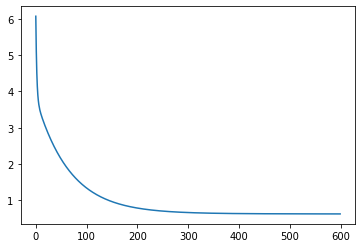

In [17]:
plt.plot(cost_his);

In [15]:
Y_preds = predict(X_test, weights)
np.mean(np.abs(Y_preds - Y_test))

0.5482948264529384

In [5]:
train = pd.read_csv("train_data.csv")
test = pd.read_csv("test_data.csv")
train.head()

,Unnamed: 0,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,1,60,3,8450,1,3,3,0,4,0,5,2,2,0,5,7,5,2003,2003,1,0,12,13,1,196.0,2,4,2,2,3,3,2,706,5,0,150,856,1,0,1,4,854,0,1710,1,0,2,1,3,1,2,6,0,1,1,2,4,4,2,0,61,0,0,0,0,0,2,2008,8,4,12.247694
1,1,2,20,3,9600,1,3,3,0,2,0,24,1,2,0,2,6,8,1976,1976,1,0,8,8,2,0.0,3,4,1,2,3,1,0,978,5,0,284,1262,1,0,1,4,0,0,1262,0,1,2,0,3,1,3,6,1,1,1,2,4,4,2,298,0,0,0,0,0,0,5,2007,8,4,12.109011
2,2,3,60,3,11250,1,0,3,0,4,0,5,2,2,0,5,7,5,2001,2002,1,0,12,13,1,162.0,2,4,2,2,3,2,2,486,5,0,434,920,1,0,1,4,866,0,1786,1,0,2,1,3,1,2,6,1,1,1,2,4,4,2,0,42,0,0,0,0,0,9,2008,8,4,12.317167
3,3,4,70,3,9550,1,0,3,0,0,0,6,2,2,0,5,7,5,1915,1970,1,0,13,15,2,0.0,3,4,0,3,1,3,0,216,5,0,540,756,1,2,1,4,756,0,1717,1,0,1,0,3,1,2,6,1,5,2,3,4,4,2,0,35,272,0,0,0,0,2,2006,8,0,11.849398
4,4,5,60,3,14260,1,0,3,0,2,0,15,2,2,0,5,8,5,2000,2000,1,0,12,13,1,350.0,2,4,2,2,3,0,2,655,5,0,490,1145,1,0,1,4,1053,0,2198,1,0,2,1,4,1,2,6,1,1,1,3,4,4,2,192,84,0,0,0,0,0,12,2008,8,4,12.429216


In [7]:
train = train.drop(["Unnamed: 0", "Id"], axis = 1)
test = test.drop(["Unnamed: 0", "Id"], axis = 1)

In [10]:
train_data = train.values
Y = train_data[:, -​1​].reshape(train_data.shape[​0​], ​1​)
X = train_data[:, :-​1​]

SyntaxError: ignored

In [9]:
test_data = test.values
Y_test = test_data[:, -​1​].reshape(test_data.shape[​0​], ​1​)
X_test = test_data[:, :-​1​]

SyntaxError: ignored